     billID Final Label
0   1653041           Y
1   1660757           Y
2   1660644           M
3   1652697           Y
4   1652282           M
5   1653008           Y
6   1652226           Y
7   1652140           Y
8   1679871           Y
9   1652826           Y
10  1652949           Y
11  1652928           Y
12  1663671           Y
13  1665609           Y
14  1714350           Y
15  1652230           Y
16  1713734           Y
17  1716173          NR
18  1716021           M
19  1652776           M
20  1654756           Y
21  1657901           Y
22  1652598        DEAD
23  1689351          NR
24  1664234           Y
25  1657671           Y
26  1652722           Y
27  1677385           Y
28  1694195          NR
29  1714988           N
30  1670887           Y
31  1652651           N
32  1652455          NR
33  1711868           M
34  1658180          NR
35  1652757          NR
36  1652095           Y
37  1658591           M
38  1689675          NR
39  1652310           N
40  1685878     

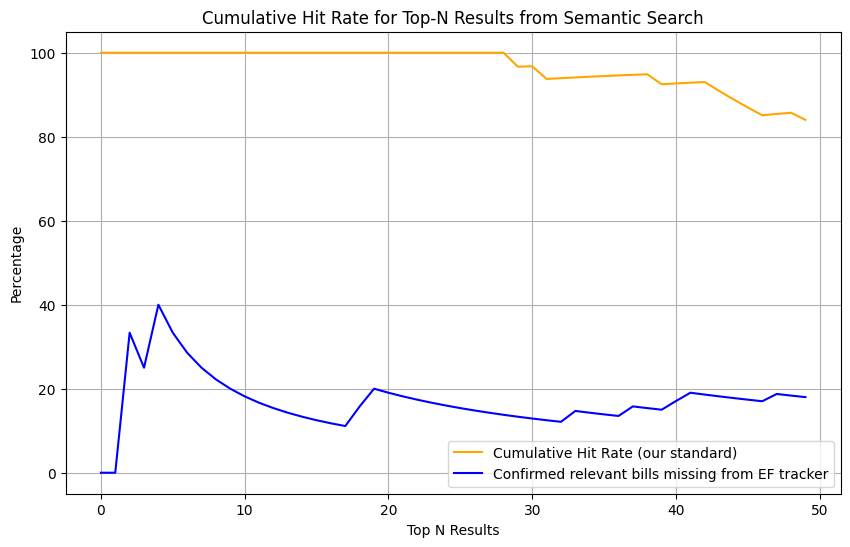

In [3]:
import pandas as pd
labeled = pd.read_csv('../data_storage/legislation/MO_weaviate_result_top_50_rerank_label_instructor.csv')

ef = pd.read_csv('../data_storage/legislation/EF-eval.csv')

result = pd.merge(labeled[['billID', 'Label']], ef[['billID', 'EF-label']], on='billID', how='left')

result['Final Label'] = result['EF-label'].fillna(result['Label'])

result.drop(columns=['Label', 'EF-label'], inplace=True)

print(result)

import pandas as pd
import matplotlib.pyplot as plt

result['Cumulative Hit Rate'] = result['Final Label'].apply(lambda x: x in ['M', 'Y', 'NR', 'DEAD']).cumsum()
result['Cumulative Hit Rate'] = result['Cumulative Hit Rate'] / (result.index + 1) * 100  # Converting to percentage

result['Cumulative M Percentage'] = (result['Final Label'] == 'M').cumsum() / (result.index + 1) * 100

result['Cumulative G-criteria Percentage'] = result['Final Label'].apply(lambda x: x in ['M', 'NR', 'DEAD']).cumsum() / (result.index + 1) * 100

# Plotting the Cumulative Hit Rate and Confirmed Missing and Relevant Bills
plt.figure(figsize=(10, 6))
plt.plot(result['Cumulative Hit Rate'], label='Cumulative Hit Rate (our standard)', color='orange')
plt.plot(result['Cumulative M Percentage'], label='Confirmed relevant bills missing from EF tracker', color='blue')
plt.title('Cumulative Hit Rate for Top-N Results from Semantic Search')
plt.xlabel('Top N Results')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)
plt.show()
